In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
salary=pd.read_csv('Salary_Data.csv')

In [4]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

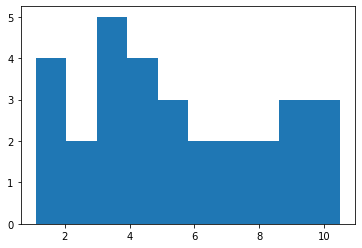

In [8]:
plt.hist(salary.YearsExperience)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

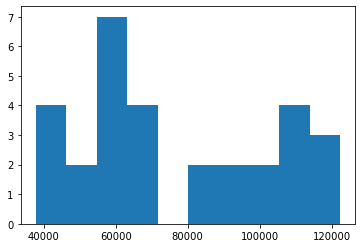

In [9]:
plt.hist(salary.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x19e25b7c9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x19e25b8a0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e25b7c640>],
 'medians': [<matplotlib.lines.Line2D at 0x19e25b8a790>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e25b8aaf0>],
 'means': []}

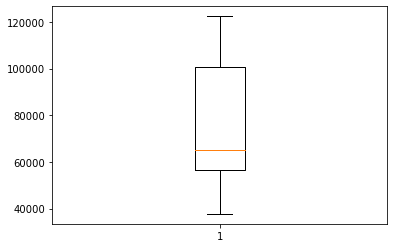

In [10]:
plt.boxplot(salary.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x19e26eb1460>,
 'caps': [<matplotlib.lines.Line2D at 0x19e26eb1b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e26eb10d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19e26ebd220>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e26ebd580>],
 'means': []}

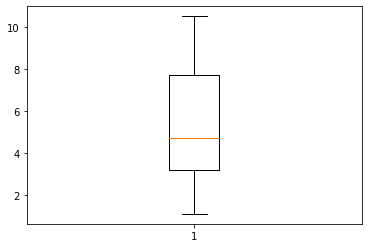

In [13]:
plt.boxplot(salary.YearsExperience)

Text(0, 0.5, 'Yearsexperience')

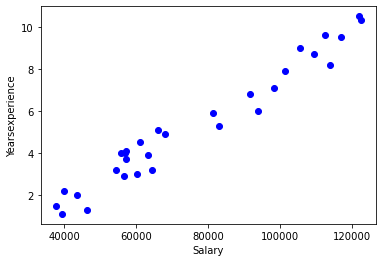

In [14]:
plt.plot(salary.Salary,salary.YearsExperience,"bo");plt.xlabel("Salary");plt.ylabel("Yearsexperience")

# Preparing Linear Regression Models

In [15]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=salary).fit()

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

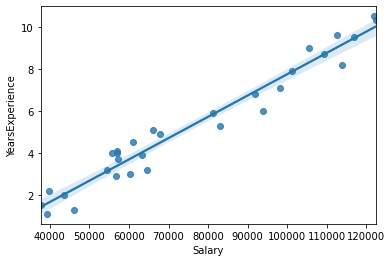

In [17]:
import seaborn as sns
sns.regplot(x='Salary',y='YearsExperience',data=salary)
# Best Fit Line For Regression Model

In [18]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        13:17:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R-Squarred Value Is > 0.95 Builded Model Is Excellent Model

In [21]:
model.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [22]:
## Lets Find Slary Hike For 10 & 20 Years Experience
newdata=pd.Series([10,20,5.5,10.5,11,11.5])

In [23]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [24]:
model.predict(data_pred)

0    120291.823413
1    214791.446628
2     77766.992967
3    125016.804574
4    129741.785735
5    134466.766895
dtype: float64

In [35]:
data_pred.corr()

,YearsExperience
YearsExperience,1.0


## Lets Apply Logarithmic Transformation On YearsExperience Column And Check For Its Accuracy

In [37]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=salary).fit()

In [40]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [41]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           3.25e-13
Time:                        13:30:04   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(model2.conf_int(0.01)) # 99% confidence level

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


In [44]:
pred2 = model2.predict(pd.DataFrame(salary['YearsExperience']))


In [46]:

pred2.corr(salary.Salary)

0.924061081788264

In [47]:
 pred2 = model2.predict(salary.iloc[:,0])

In [48]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

Text(0, 0.5, 'YearsExperience')

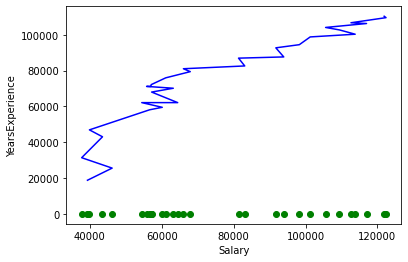

In [49]:
plt.scatter(x=salary['Salary'],y=salary['YearsExperience'],color='green');plt.plot(salary['Salary'],pred2,color='blue');plt.xlabel('Salary');plt.ylabel('YearsExperience')

## Lets Apply Logarithmic Transformation On Salary Column And Check For Its Accuracy

In [50]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=salary).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           7.03e-18
Time:                        13:38:42   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
print(model3.conf_int(0.01)) # 99% confidence level

                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


In [53]:
pred_log = model3.predict(pd.DataFrame(salary['YearsExperience']))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [54]:
pred3=np.exp(pred_log)  # as we have used log(Salary) in preparing model so we need to convert it back
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [56]:
pred3.corr(salary.YearsExperience)

0.9881994372988415

Text(0, 0.5, 'Yearsexperience')

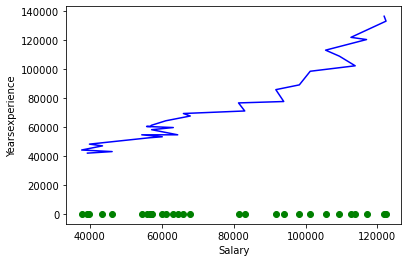

In [57]:
plt.scatter(x=salary['Salary'],y=salary['YearsExperience'],color='green');plt.plot(salary.Salary,np.exp(pred_log),color='blue');plt.xlabel('Salary');plt.ylabel('Yearsexperience')

In [59]:
resid_3 = pred3-salary.YearsExperience
resid_3

0      41997.857468
1      43064.766794
2      44158.789228
3      47017.029189
4      48211.488474
5      52636.242472
6      53300.675386
7      54654.814935
8      54654.814935
9      58192.630788
10     59671.082903
11     60424.338456
12     60424.338456
13     61187.104604
14     64335.699291
15     67646.346149
16     69365.028712
17     71127.384635
18     76687.730780
19     77655.835040
20     85853.904208
21     89146.625393
22     98557.909591
23    102337.910512
24    108962.840758
25    113141.933364
26    120466.319601
27    121987.143836
28    133184.321344
29    136568.329694
dtype: float64

### so we will consider the model having highest R-Squared value which is the log transformation - model3
### getting residuals of the entire data set

Text(0, 0.5, 'Actual')

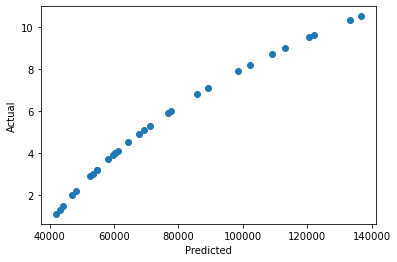

In [61]:
# Predicted vs actual values
plt.scatter(x=pred3,y=salary.YearsExperience);plt.xlabel("Predicted");plt.ylabel("Actual")


Text(0, 0.5, 'Standardized Residual')

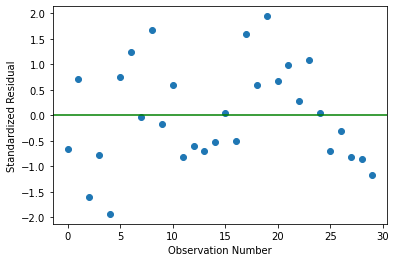

In [62]:
student_resid = model3.resid_pearson 
student_resid
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")


In [67]:
data_pred 

,YearsExperience
0,10.0
1,20.0
2,5.5
3,10.5
4,11.0
5,11.5


## Prediction Using New Values As[10,20,5.5,10.5,11.0,11.5]

In [63]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [66]:
model3.predict(data_pred)

0    11.761931
1    13.016460
2    11.197393
3    11.824657
4    11.887384
5    11.950110
dtype: float64